In [6]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

## Clustering

In [4]:
G = nx.Graph()
G.add_edges_from([('A', 'K'),('A', 'B'),('A', 'C'),('B', 'C'),('B', 'K'),('C', 'E'),
                  ('C', 'F'),('D', 'E'),('E', 'F'),('E', 'H'),('F', 'G'),('I', 'J')])

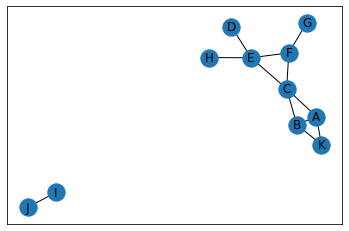

In [9]:
plot_graph(G)

In [10]:
nx.clustering(G,'F')

0.3333333333333333

In [11]:
nx.clustering(G,'A')

0.6666666666666666

In [12]:
nx.clustering(G,'J')

0

In [13]:
nx.average_clustering(G)

0.28787878787878785

Inside each triangle there are 3 open triads

In [14]:
nx.transitivity(G)

0.4090909090909091

**Clustering coefficient** measures the degree to which nodes in a network tend to 'cluster' or form triangles

* Local Clustering Coefficient: Fraction of pairs of the node's friends that are friends with each other (LCC)
* Global Clustering Coefficient:
    * Average Local Cluster Coefficient: `nx.average_clustering(G)`
    * Transitivity: Ratio of number of triangles and number of 'open triads'; puts larger weight on high degree nodes `nx.transitivity(G)`

## Distance Measures

In [25]:
G = nx.Graph()
G.add_edges_from([('A', 'K'),('A', 'B'),('A', 'C'),('B', 'C'),('B', 'K'),('C', 'E'),
                  ('C', 'F'),('D', 'E'),('E', 'F'),('E', 'H'),('F', 'G')])

In [26]:
nx.shortest_path(G, 'A', 'H')

['A', 'C', 'E', 'H']

In [27]:
nx.shortest_path_length(G, 'A', 'H')

3

### Breadth-First Search

In [28]:
T = nx.bfs_tree(G, 'A')
T.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('F', 'G')])

In [29]:
nx.shortest_path_length(G, 'A')

{'A': 0, 'K': 1, 'B': 1, 'C': 1, 'E': 2, 'F': 2, 'D': 3, 'H': 3, 'G': 3}

In [30]:
nx.average_shortest_path_length(G)

2.138888888888889

**Diameter**: maximum distance between any pair of nodes

In [33]:
nx.diameter(G)

4

The **Eccentricity**: of a node *n* is the largest distance between *n* and all other nodes

In [34]:
nx.eccentricity(G)

{'A': 3, 'K': 4, 'B': 3, 'C': 2, 'E': 3, 'F': 3, 'D': 4, 'H': 4, 'G': 4}

The **radius** of a graph is the minimum eccentricity

In [35]:
nx.radius(G)

2

The **Periphery** of a graph is the set of nodes that have eccentricity equal to the diameter

In [36]:
nx.periphery(G)

['K', 'D', 'H', 'G']

The **center** of a graph is the set of nodes that have eccentricity equals to the radius

In [37]:
nx.center(G)

['C']

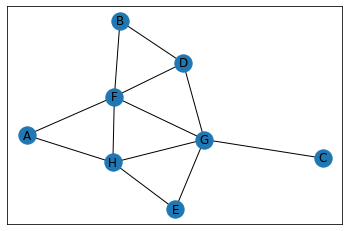

In [38]:
P = nx.Graph()
P.add_edges_from([('A', 'F'),('A', 'H'),('F', 'B'),('F', 'D'),('F', 'G'),('F', 'H'),
                  ('B', 'D'),('D', 'G'),('G', 'H'),('G', 'C'),('G', 'E'),('H', 'E')])
plot_graph(P)

In [39]:
nx.diameter(P)

3

In [41]:
nx.eccentricity(G)

{'A': 3, 'K': 4, 'B': 3, 'C': 2, 'E': 3, 'F': 3, 'D': 4, 'H': 4, 'G': 4}

In [44]:
K = nx.karate_club_graph()
K = nx.convert_node_labels_to_integers(K, first_label=1)

In [46]:
nx.average_shortest_path_length(K), nx.radius(K), nx.diameter(K)

(2.408199643493761, 3, 5)

In [47]:
nx.center(K)

[1, 2, 3, 4, 9, 14, 20, 32]

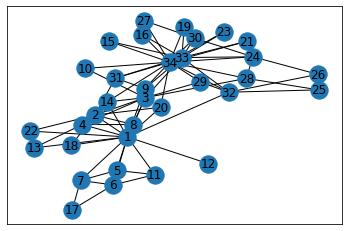

In [48]:
plot_graph(K)

In [49]:
nx.periphery(K)

[15, 16, 17, 19, 21, 23, 24, 27, 30]

In [50]:
nx.shortest_path_length(K, 34)

{34: 0,
 9: 1,
 10: 1,
 14: 1,
 15: 1,
 16: 1,
 19: 1,
 20: 1,
 21: 1,
 23: 1,
 24: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 1: 2,
 3: 2,
 2: 2,
 4: 2,
 26: 2,
 25: 2,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 11: 3,
 12: 3,
 13: 3,
 18: 3,
 22: 3,
 17: 4}

## Connected Components

An undirected graph is **connected** if, for every pair nodes, there's a path between them

In [51]:
nx.is_connected(G)

True

**Connected component**: a subset of nodes such as:
1. every node in the subset has a path to every other node
2. no other node has a path to any node in the subset

In [53]:
nx.number_connected_components(G)

1

In [54]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K'}]

A directed graph is **strongly connected** if, for every pair nodes *u* and *v*, ther is a directed path from *u* to *v* and a directed path from *v* to *u*

In [ ]:
nx.is_strongly_connected(G)

A directed graph is **weakly connected** if replacing all directed edges with udirected edges produces a connected undirected graph

In [ ]:
nx.is_weakly_connected(G)

## Network Robustness

The ability of a network to maintain its general structural properties when it faces failures or attacks

**Type of attacks**: removal of nodes or edges
**Structural properties**: connectivity
**Examples**: airports closures, internet routes failures

**Node connectivity**: minimum number of *nodes* needed to disconnect a graph or pair of nodes
**Edge connectivity**: minimum number of *edges* needed to disconnect a graph or pair of nodes

Graphs with large node and edge connectivity are more robust to the loss of nodes and edges

In [60]:
nx.node_connectivity(G), nx.minimum_node_cut(G)

(1, {'F'})

In [61]:
nx.edge_connectivity(G), nx.minimum_edge_cut(G)

(1, {('E', 'H')})

In [62]:
G_ex = nx.DiGraph()
G_ex.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'), ('A', 'N'), 
                     ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'), 
                     ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'), 
                     ('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'), 
                     ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'), 
                     ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])

In [64]:
nx.minimum_edge_cut(G_ex, 'H', 'O')

{('J', 'O'), ('N', 'O')}

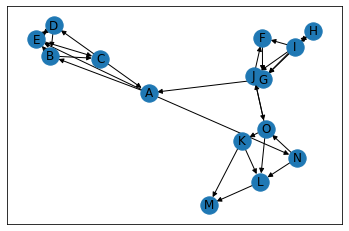

In [65]:
plot_graph(G_ex)